<a href="https://colab.research.google.com/github/Priyo-prog/Statistics-and-Data-Science/blob/main/Feature%20Selection%20Complete/Filter%20Methods/anova_test.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Univariate feature selection**

Univariate feature selection works by selecting the best features based on univariate statistical tests (ANOVA). The methods estimate the degree of linear dependency between two random variables. In this case, any of the predictor variables and the target.

ANOVA assumes a linear relationship between the feature and the target and that the variables follow a Gaussian distribution. If this is not true, the result of this test may not be useful.

These may not always be the case for the variables in your dataset, so if looking to implement these procedure, you will need to corroborate these assumptions.

I will demonstrate how to select features based on univariate tests using sklearn with a regression and classification dataset.

For the sake of the demonstration, I will assume that the variables show a linear relationship with the target and that they are normally distributed.

In [1]:
# Import important libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.feature_selection import f_classif, f_regression
from sklearn.feature_selection import SelectKBest, SelectPercentile

In [2]:
# Mount the google drive
from google.colab import drive
drive.mount("/content/drive")

Mounted at /content/drive


In [3]:
filename = "/content/drive/MyDrive/Data Science/Feature Selection/dataset_2.csv"

In [4]:
df = pd.read_csv(filename)

In [5]:
# Separatethe data on features and labels
X = df.drop(labels="target", axis=1)
y = df["target"]

In [6]:
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.3, random_state=0)
X_train.shape, X_test.shape

((35000, 108), (15000, 108))

## **Perform Univariate Anova**

In [7]:
univariate = f_classif(X_train, y_train)
type(univariate)

tuple

In [8]:
univariate[:2]

(array([2.92073990e-01, 3.67738039e+01, 1.30411853e+01, 1.17574360e+01,
        1.41563181e+01, 3.06381672e+01, 2.02234060e+01, 2.96271569e+00,
        2.29045228e-01, 3.77443721e+00, 2.90430896e+00, 1.91250548e+01,
        5.05376700e+01, 1.19013857e+01, 2.07311280e+01, 7.33476852e+02,
        4.27044609e+01, 1.27667244e+01, 6.44432030e+00, 1.19060034e+01,
        2.73829670e+02, 3.90587287e+00, 1.12131044e+01, 3.51833011e+00,
        7.22171922e-01, 4.33080273e+01, 1.11696498e+00, 1.35149019e+01,
        7.04378672e-01, 7.82273154e+01, 1.07853079e+01, 5.07871810e+00,
        1.88154600e+00, 5.39927733e+02, 3.35223342e-02, 7.88844093e+00,
        2.39605100e+01, 2.36349439e+01, 5.53456743e+00, 2.23456221e-04,
        1.62264425e+00, 2.64838234e+00, 7.22501472e+00, 1.25555915e+00,
        1.32941890e+01, 3.83273241e+00, 3.27938257e+00, 1.98713697e+02,
        2.76343404e-02, 9.87511329e+00, 1.15466653e+01, 7.89411872e+00,
        2.45008055e+00, 2.00266136e+00, 2.16675637e+03, 1.264599

In [9]:
# 1) let's capture the pvalues in a pandas series
# 2) add the variable names in the index
# 3) sort the features based on their anova pvalues
# 4) and make a var plot

univariate = pd.Series(univariate[1]) # This is the p-value
univariate.index = X_train.columns
univariate

var_1       5.888980e-01
var_2       1.340173e-09
var_3       3.051410e-04
var_4       6.067044e-04
var_5       1.685054e-04
               ...      
var_105     6.382255e-01
var_106     5.356733e-05
var_107     6.443435e-03
var_108    3.153813e-158
var_109     8.594164e-04
Length: 108, dtype: float64

<Axes: >

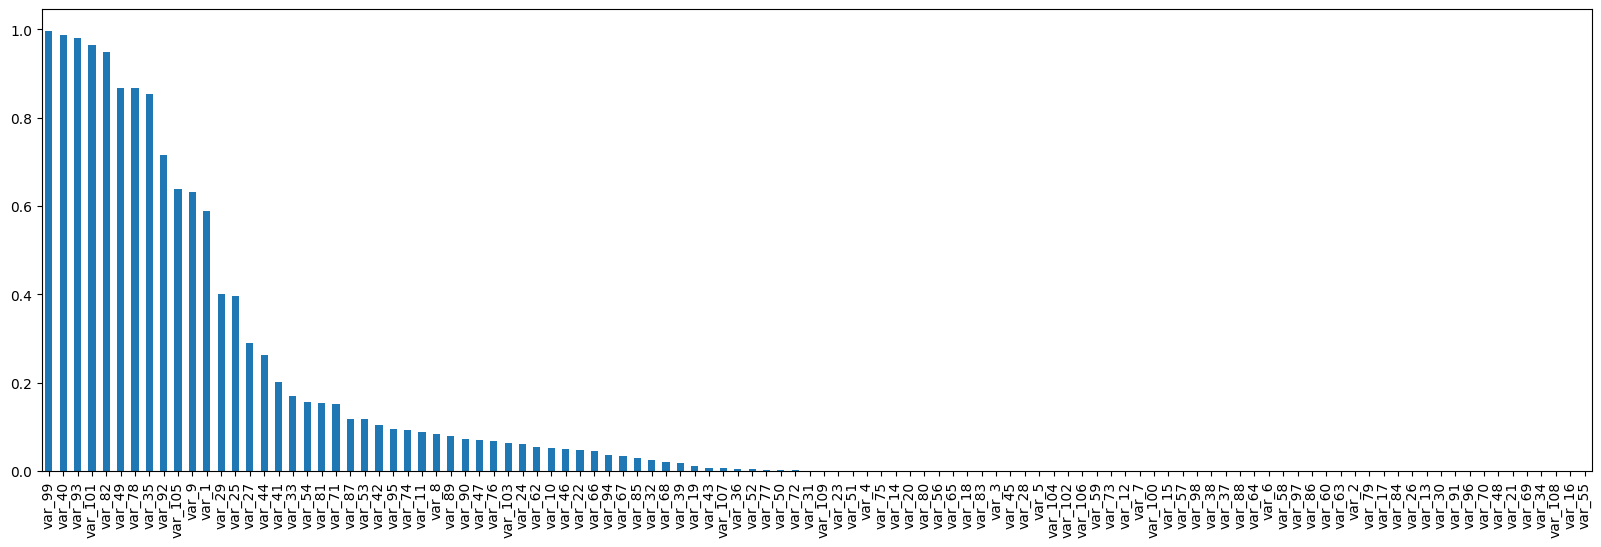

In [10]:
univariate.sort_values(ascending=False).plot.bar(figsize=(20,6))

The smaller the p_value the more predictive the feature is.

Features on the left of the plot are very bad at predicting the target. The most predictive features are on the right of the plot.

**How can we select features based on the anova p-values?**

There are a few ways in which this can be done:

Select top k features, where k is an arbitrary number of features

Select features in the top n percentile, where n is again an arbitrary number

Select all features below a certain threshold, arbitrarily decided.

Scikit-learn transformer **SelectKBest**, allows us to automatically select the top k features, based of any statistical value, including Anova. It will select those with the lowest pvalues.

Sklearn's **SelectPercentile** allows us to select the features in the top percentile of any statistical value, including the anova.

Alternatively, if we want to select features based on a pvalue threshold, we can do it manually.

## **Select top 10 values based on anova**

In [11]:
sel = SelectKBest(f_classif, k=10)

In [12]:
sel.fit(X_train.fillna(0), y_train)

SelectKBest()

In [13]:
sel.get_support()

array([False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False,  True, False, False,
       False, False,  True, False, False, False, False, False, False,
       False, False, False, False, False, False,  True, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False,  True, False, False, False, False, False, False,
        True, False, False, False, False, False, False, False, False,
       False, False, False, False,  True,  True, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False,  True,
       False, False, False, False,  True, False, False, False, False,
       False, False, False, False, False, False, False,  True, False])

In [15]:
X_train.columns[sel.get_support()]

Index(['var_16', 'var_21', 'var_34', 'var_48', 'var_55', 'var_69', 'var_70',
       'var_91', 'var_96', 'var_108'],
      dtype='object')

In [16]:
# Select the data based on anova test
X_train = sel.transform(X_train.fillna(0))
X_train.shape

(35000, 10)

## **Regression**

In [18]:
X_train, X_test , y_train, y_test = train_test_split(X,y, test_size=0.3, random_state=0)

<Axes: >

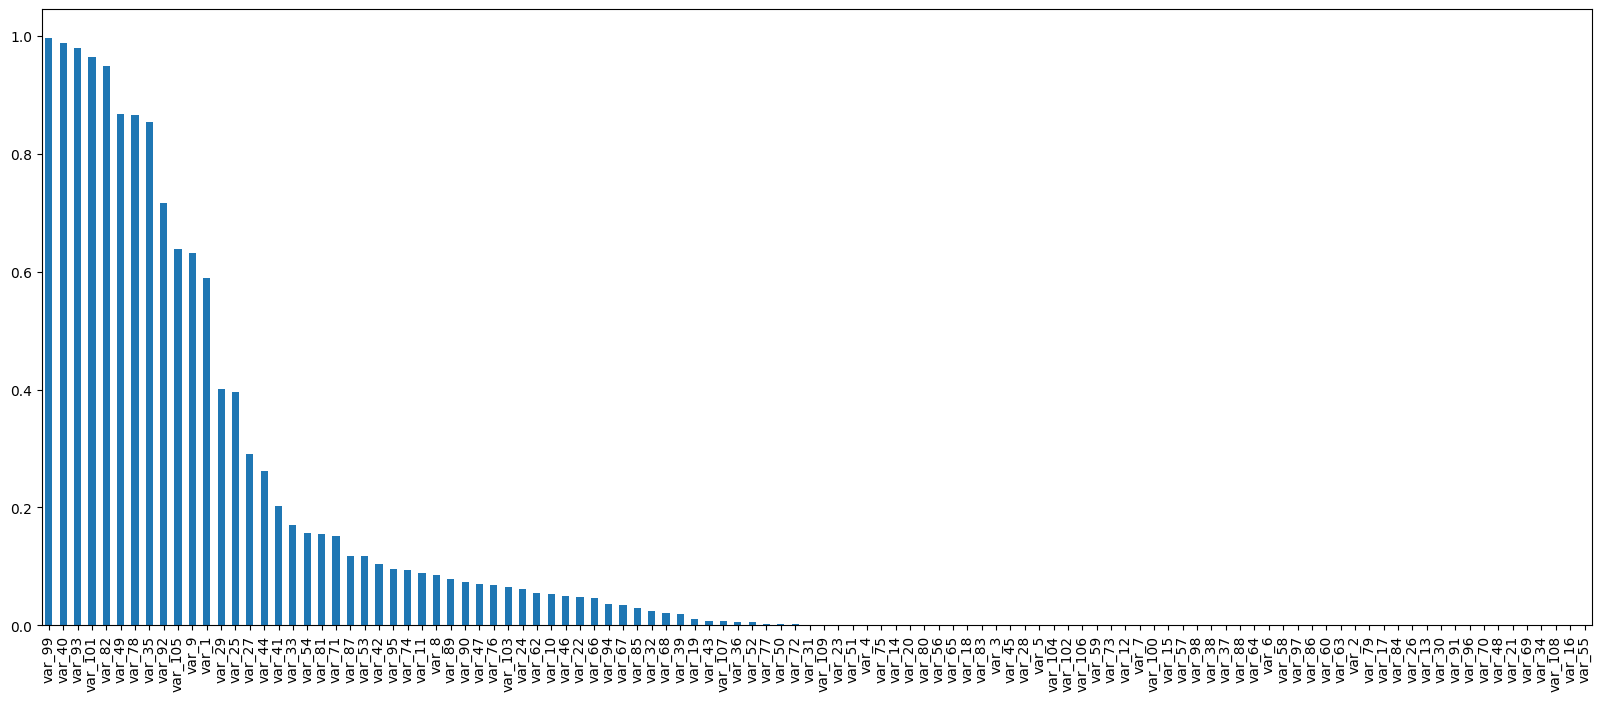

In [19]:
univariate = f_regression(X_train.fillna(0), y_train)
univariate = pd.Series(univariate[1])
univariate.index = X_train.columns
univariate.sort_values(ascending=False).plot.bar(figsize=(20,8))